In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('xgboost_model_train.csv')

In [3]:
data.head()

,msno,city,bd,gender,registered_via,days,season,num_of_logs,sum_num25,avg_num25,...,least_popular_transaction_days,most_popular_transaction_season,least_popular_transaction_season,most_popular_expire_days,least_popular_expire_days,most_popular_expire_season,least_popular_expire_season,is_auto_renew,payment_id_is_always_auto_renew,is_churn
0,7Bx3zw0JFFwCXjkWgqhMxnQQLzy7Idmc+J1qXU8GhAY=,13,25.0,1.0,9,3,4,30,100,3.333333,...,3,2,2,3,3,2,2,1,40,1
1,OFhJwMVNuJKYC6MNLmCulVSJatkQ1ZexipKpyujQa4c=,5,NaN,1.0,9,3,4,21,136,6.476190,...,1,2,2,1,1,2,2,1,38,0
2,OFjgd4O5aCzXBFosKhGhqB8bKEgtV/9RQSN28yPtGHk=,1,NaN,NaN,7,2,1,18,34,1.888889,...,2,2,2,2,2,3,3,0,34,0
3,G7Zl2XAspwOaYJLlKK3FLmgypn3qYeGFKC/9WbczS+0=,4,43.0,1.0,7,3,2,5,18,3.600000,...,3,2,2,1,1,4,4,0,24,1
4,7v4BtQAEWazr9JYq5iqbNtWp0SNTNgKTBNZ0z+9CGEM=,15,21.0,1.0,3,3,2,25,388,15.520000,...,1,2,2,2,2,3,3,0,17,1


In [4]:
data.dtypes

msno                                 object
city                                  int64
bd                                  float64
gender                              float64
registered_via                        int64
days                                  int64
season                                int64
num_of_logs                           int64
sum_num25                             int64
avg_num25                           float64
sum_num50                             int64
avg_num50                           float64
sum_num75                             int64
avg_num75                           float64
sum_num985                            int64
avg_num985                          float64
sum_num100                            int64
avg_num100                          float64
sum_num_unq                           int64
avg_num_unq                         float64
sum_total_secs                      float64
avg_total_secs                      float64
sum_total_songs                 

In [5]:
data.drop('msno', axis=1, inplace=True)
X = data.drop('is_churn', axis=1)

In [6]:
y = data.is_churn

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

### Searching for best max depth and min child weights using non-default and non-customizable params:
- objective
- colsample_bytree
- n_estimators
- seed

#### Learning rate and subsample lower

In [8]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

cv_params1 = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}

xgb_clf1 = xgb.XGBClassifier(
        objective = 'binary:logistic',
        learning_rate = 0.1,
        subsample = 0.8,
        colsample_bytree = 0.8,
        n_estimators = 1000
    )

clf1 = GridSearchCV(xgb_clf1, cv_params1, 
                    scoring = 'f1', cv = 5, n_jobs = -1) 
clf1.fit(X, y)

/Users/nikitarimskij/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nikitarimskij/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [9]:
clf1.grid_scores_

[mean: 0.63034, std: 0.00500, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.62500, std: 0.00837, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.62536, std: 0.01245, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.61731, std: 0.00753, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.62460, std: 0.00638, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.62277, std: 0.00988, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.62688, std: 0.00917, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.62147, std: 0.00943, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.61883, std: 0.01619, params: {'max_depth': 7, 'min_child_weight': 5}]

### Accepting best params and searching for best rate and subsamples

In [9]:
cv_params2 = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}

xgb_clf2 = xgb.XGBClassifier(
        objective = 'binary:logistic',
        learning_rate = 0.1,
        colsample_bytree = 0.8,
        n_estimators = 1000,
        min_child_weight = 1,
        max_depth = 3
    )

clf2 = GridSearchCV(xgb_clf2, cv_params2, 
                    scoring = 'f1', cv = 5, n_jobs = -1) 
clf2.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [10]:
clf2.grid_scores_

[mean: 0.63117, std: 0.00781, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.63034, std: 0.00500, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.62612, std: 0.00972, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.68081, std: 0.01175, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.68316, std: 0.01299, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.68297, std: 0.01498, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [12]:
xgdmat = xgb.DMatrix(X, y)

In [33]:
our_params = {'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.8, 'colsample_bytree': 1, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1} 

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'],
                early_stopping_rounds = 100) 

In [34]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
37,0.338667,0.011614,0.332625,0.003576
38,0.337833,0.010835,0.332042,0.003978
39,0.338833,0.010962,0.332167,0.004024
40,0.338500,0.011455,0.332167,0.003956
41,0.337333,0.010664,0.332417,0.003772


In [35]:
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 48)

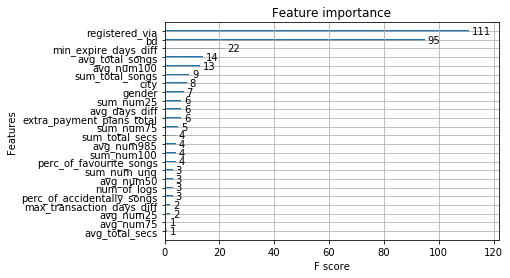

In [36]:
import matplotlib.pyplot as plt

xgb.plot_importance(final_gb)
plt.show()

In [37]:
importances = final_gb.get_fscore()
importances

{'avg_days_diff': 6,
 'avg_num100': 13,
 'avg_num25': 2,
 'avg_num50': 3,
 'avg_num75': 1,
 'avg_num985': 4,
 'avg_total_secs': 1,
 'avg_total_songs': 14,
 'bd': 95,
 'city': 8,
 'extra_payment_plans_total': 6,
 'gender': 7,
 'max_transaction_days_diff': 2,
 'min_expire_days_diff': 22,
 'num_of_logs': 3,
 'perc_of_accidentally_songs': 3,
 'perc_of_favourite_songs': 4,
 'registered_via': 111,
 'sum_num100': 4,
 'sum_num25': 6,
 'sum_num75': 5,
 'sum_num_unq': 3,
 'sum_total_secs': 4,
 'sum_total_songs': 9}

In [38]:
testdmat = xgb.DMatrix(X_val)

In [39]:
y_pred = final_gb.predict(testdmat)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [40]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred)

0.69589816124469595

Параметры:
- learning_rate
- n_estimators 
- subsample - сколько рандомных данных брать из выборки, похоже на дроп аут в нейросетях
- colsample_bytree - аналогично верхнему, но для каждого ответвления
- objective - спецификация задачи
- max_depth
- min_child_weight - минимальная сумма весов в листе, если меньше, то дерево не пойдет глубже